### TODO:
    - explore such redundancies in data/labels
    - do better EDA
    - rename some labels if need be
    - create network graph
    - create geographigcal viz (geopandas)
    - analysis
    - Guilt stkaren into writing most of latex/ppt :P

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/cpj.csv')
data.head()

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n


In [3]:
sex = data.Sex
sex.dropna(inplace=True)
sex.groupby(sex).count()

Sex
Female      80
Male      1136
Name: Sex, dtype: int64

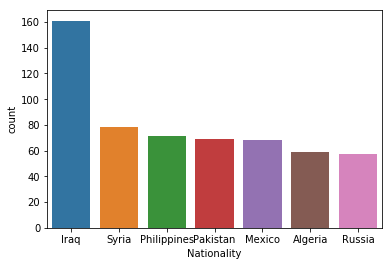

In [4]:
# countries = data.Nationality
# countries.dropna(inplace=True)
# counts = countries.groupby(countries).count()

# subset= counts[counts > 50].index
# print(list(subset))
# high_death_nat = countries[countries.isin(subset)]
sns.countplot(data = data, x = 'Nationality', order = data.Nationality.value_counts().iloc[:7].index)

In [5]:
not_freelance = data[~data['Organization'].isin(['Freelance', 'freelance','Freelancer'])].dropna()
group = not_freelance.groupby('Organization')['Organization']\
    .count().reset_index(name='count')\
    .sort_values(['count'], ascending=False)

group.head()
# sns.countplot(data = not_freelance, x = 'Organization', order = not_freelance.Organization.value_counts().iloc[:7].index)

,Organization,count
55,Algerian State Television,6
321,Ozgur Gundem,6
30,Al-Iraqiya,6
79,Baghdad TV,5
43,Al-Shaabiya,5


In [6]:
# TODO:
freelance = data[data['Organization'].isin(['Freelance', 'freelance','Freelancer'])].dropna()
group = freelance.groupby('Organization')['Organization']\
    .count().reset_index(name='count')\
    .sort_values(['count'], ascending=False)

group.head()

,Organization,count
0,Freelance,32
2,freelance,22
1,Freelancer,14


## My experiments with networkx

In [7]:
# !pip install networkx
# !pip install nose

In [8]:
import networkx as nx

In [9]:
# generate nodes for a 5 users
# generate nodes for their assignments
# link nodes

In [10]:
subset_5 = data.iloc[:, :]
print(subset_5.shape)

(1782, 18)


In [11]:
subset_5.iloc[4, :].Coverage.split(",")

['Business',
 ' Corruption',
 ' Crime',
 ' Culture',
 ' Human Rights',
 ' Politics',
 ' Sports']

In [12]:
seen_covs = set()
G = nx.Graph()
coverage_subset = subset_5.dropna(subset=["Coverage"])
coverage_subset.iloc[2,:].Coverage

'Politics, War'

In [13]:
for i in range(len(coverage_subset)):
    name = coverage_subset.iloc[i,:].Name
    coverage = coverage_subset.iloc[i,:].Coverage
#     print(coverage)
#     .split(",")
#     if type np.:# is None:
#         continue
#         print(coverage)
    coverage = map(lambda x: x.strip(), coverage.split(","))
    added = False
    for c in coverage:
#         if c not in seen_covs:
# #             G.add_node(c)
            seen_covs.add(c)
            G.add_edge(c, name)
            G.nodes[c]['type'] = 'coverage'
            G.nodes[name]['type'] = 'person'
#             added = True
#     if not added:
#         G.add_node(name)
#         G.nodes[name]['type'] = 'person'
#     G.add_edges_from(edge_list)
# print(G.nodes)
print(G.number_of_edges())
print(G.number_of_nodes())

1957
1166


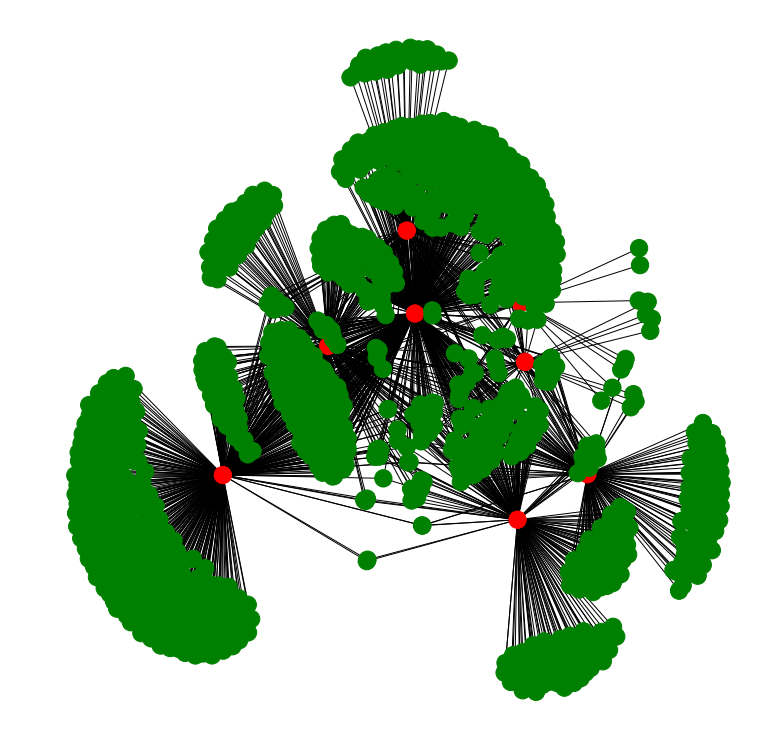

In [14]:
node_colors = ['g' if G.nodes[node]['type'] == 'person' else 'r' for node in G.nodes ]
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=False, font_weight='bold', node_color=node_colors)#labels=True=> too much text

**NOTE:** Adding edges adds new nodes if an endpoint is unseen but doesn't add new nodes if a node with same label exists:
Good for us..

Find better ways to visualize graphs, and learn how to analyze such graphs

In [15]:
seen_covs

{'Business',
 'Corruption',
 'Crime',
 'Culture',
 'Human Rights',
 'Politics',
 'Sports',
 'War'}

In [16]:
data.head()

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n


### cleaning

In [17]:
# data.Date = pd.to_datetime(data.Date,format="%m%d,%Y")#infer_datetime_format=True
# data.Date.head() 

#doesnt work

In [18]:
import numpy as np

In [159]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October","November","December"]

l_num = np.arange(12) + 1

months_dict = dict(zip(months, l_num))
dates = []
for d in data.Date:
    if d != "Unknown":
        t = d.split()
#         print(t)

        m = str(months_dict.get(t[0].strip(), "Unknown"))
        d = t[1][:-1]
        y = t[-1][-2:]
        if len(d) == 1:
            d = "0" + d
        if len(m) == 1:
            m = "0" + str(m)
        date_str =  str(m)+d+y #m + y#
        
    else:
        date_str = d
#     print(date_str)
    dates.append(date_str)

In [160]:
date_df = pd.Series(dates)
date_df = pd.to_datetime(date_df, infer_datetime_format=True, errors='coerce')

In [161]:
dates[0]

'102216'

In [162]:
date_df.head()

0   2016-10-22
1   2016-10-21
2   2016-10-02
3   2016-08-14
4   2016-08-08
dtype: datetime64[ns]

In [163]:
date_df[0]

Timestamp('2016-10-22 00:00:00')

In [164]:
## see where date is NaAT
nat_rows = date_df.isnull()
date_df[nat_rows]

11     NaT
12     NaT
13     NaT
14     NaT
59     NaT
75     NaT
86     NaT
92     NaT
125    NaT
128    NaT
147    NaT
152    NaT
160    NaT
219    NaT
323    NaT
357    NaT
391    NaT
476    NaT
507    NaT
549    NaT
560    NaT
593    NaT
613    NaT
685    NaT
709    NaT
814    NaT
922    NaT
1046   NaT
1081   NaT
1094   NaT
1096   NaT
1148   NaT
1170   NaT
1173   NaT
1174   NaT
1175   NaT
1176   NaT
1199   NaT
1217   NaT
1316   NaT
1326   NaT
1374   NaT
1415   NaT
1416   NaT
1437   NaT
1491   NaT
1555   NaT
1622   NaT
1626   NaT
1629   NaT
1639   NaT
1760   NaT
1761   NaT
1763   NaT
1764   NaT
dtype: datetime64[ns]

In [165]:
data.Date[nat_rows]

11                               October 2015 - June 2016
12                               October 2015 - June 2016
13                               October 2015 - June 2016
14                               October 2015 - June 2016
59                                            August 2015
75                                     May 2,3 or 4, 2015
86                                                Unknown
92                                           January 2015
125                             August or September, 2014
128                                           August 2014
147                                              May 2014
152                                               Unknown
160                       Between February 5 and 11, 2014
219                                               Unknown
323                                         November 2011
357                                            March 2011
391                                     May 9 or 10, 2010
476           

In [166]:
for row_id in nat_rows[nat_rows == True].index:
    nat_date = data.Date[row_id]
    words = nat_date.split(', ')
    if words[-1].isdigit():
        m,d,y = "0","0","0"
        temp = False
        #if first one is month use mm/01/yy
        m = str(months_dict.get(words[0], None))
        if m != 'None':
            if len(m) ==1:
                m = "0" + m
            d = "01"
            y = words[-1][-2:]
            
            date_df[row_id] = m + d + y
#             print(words, m+d+y)
            temp = True
        #if first one is month +mintuple days use mm/01/yy
        m = months_dict.get(words[0].split()[0], None)
        if m:
            if len(str(m)) ==1:
                m = "0" + str(m)
            d = "01"
            y = words[-1][-2:]
#             print(words, str(m)+d+y)
            date_df[row_id] =  str(m) + d + y
            temp = True
#         print(words, str(m)+d+y)
        
        if not temp:
            print(words)

        
        #if first moth is mid- or Between: use year what then
        #
#         date_df[row_id] = 

['Between February 5 and 11', '2014']
['mid-April', '2005']
['April-June', '1994']


In [150]:
date_df = pd.to_datetime(date_df, infer_datetime_format=True, errors='coerce')

In [167]:
new_nat = date_df.isnull()
len(new_nat[new_nat == True]), len(nat_rows[nat_rows == True])

(36, 55)

In [196]:
# print(data.Date[nat_rows])
# print("new")
# print(data.Date[new_nat])

In [193]:
ctr = 0
# dates = list(date_df)
for row_id in new_nat[new_nat == True].index:
    nat_date = data.Date[row_id]
    words = nat_date.split()
#     print(words)
    if words[-1].isdigit():
        m,d,y = "0","0","0"
        temp = False
#         if first one is month use mm/01/yy
        m = str(months_dict.get(words[0], None))
        if m != 'None':
            if len(m) ==1:
                m = "0" + m
            d = "01"
            y = words[-1][-2:]
            
            date_df[row_id] = pd.to_datetime(m + d + y)
# #             print(words, m+d+y)
#             temp = True
            print(words, m+d + y)
            ctr +=1
print(ctr)

['October', '2015', '-', 'June', '2016'] 100116
['October', '2015', '-', 'June', '2016'] 100116
['October', '2015', '-', 'June', '2016'] 100116
['October', '2015', '-', 'June', '2016'] 100116
['August', '2015'] 080115
['January', '2015'] 010115
['August', '2014'] 080114
['May', '2014'] 050114
['November', '2011'] 110111
['March', '2011'] 030111
['January', '2009'] 010109
['September', '2006'] 090106
['June', 'or', 'July', '1993'] 060193
['January', '1993'] 010193
['October', '2015', '-', 'June', '2016'] 100116
['July', '2011'] 070111
['January', '2010'] 010110
['April', '2007'] 040107
['September', '1993'] 090193
['June', 'or', 'July', '1993'] 060193
['June', 'or', 'July', '1993'] 060193
21


In [194]:
date_df = pd.to_datetime(dates, infer_datetime_format=True, errors='coerce')
new_nat_2 = date_df.isnull()
len(new_nat_2[new_nat_2 == True]), len(new_nat[new_nat == True])

(15, 36)

In [195]:
data.Date[new_nat_2]

86                                                Unknown
152                                               Unknown
160                       Between February 5 and 11, 2014
219                                               Unknown
549                                            July 2007,
593     on an unknown date (death disclosed February 2...
685                                       mid-April, 2005
814                                  Date unknown in 2002
1081                                     April-June, 1994
1374                                 Date unknown in 2013
1622                                         Date unknown
1626                                         Date unknown
1629                                         Date unknown
1639                                         Date unknown
1764                                          summer 1993
Name: Date, dtype: object

Not sure what to do with this now ???

### checking duplicates

In [36]:
#dont drop any dates here
#once correctly formated use
#data.Dates = dates_df

In [37]:
def check_dups(some_col):
#     coverage = data.Coverage

    col_list= []
    for c in some_col:
    #     print(c)
        col_list += str(c).split(", ")

    # print(cov_list)
    words_dict = {}
    for c in col_list:
        if not words_dict.get(c, None):
            words_dict[c] = 1
        else:
            words_dict[c] += 1
    return words_dict

In [38]:
check_dups(data.Coverage)

{'War': 477,
 'Politics': 566,
 'Business': 54,
 'Corruption': 246,
 'Crime': 191,
 'Culture': 138,
 'Human Rights': 256,
 'Sports': 29,
 'nan': 624}

In [127]:
check_dups(data.Country_killed)

{'Iraq': 264,
 'Libya': 13,
 'Pakistan': 86,
 'Yemen': 19,
 'Syria': 116,
 'Brazil': 49,
 'Ukraine': 19,
 'Mexico': 89,
 'Turkey': 29,
 'Afghanistan': 36,
 'India': 69,
 'Guinea': 4,
 'Somalia': 66,
 'France': 10,
 'Bangladesh': 29,
 'Ghana': 1,
 'Colombia': 84,
 'USA': 9,
 'Poland': 1,
 'Kenya': 5,
 'Democratic Republic of the Congo': 14,
 'Guatemala': 23,
 'South Sudan': 8,
 'Paraguay': 6,
 'Myanmar': 4,
 'Israel and the Occupied Palestinian Territory': 21,
 'Central African Republic': 1,
 'Philippines': 133,
 'Egypt': 13,
 'South Africa': 4,
 'Mali': 2,
 'Russia': 80,
 'Iran': 5,
 'Cambodia': 12,
 'Tanzania': 2,
 'Ecuador': 3,
 'Lebanon': 10,
 'Indonesia': 11,
 'Bahrain': 3,
 'Nigeria': 19,
 'Thailand': 16,
 'Azerbaijan': 6,
 'Panama': 1,
 'Peru': 15,
 'Dominican Republic': 4,
 'Ivory Coast': 6,
 'El Salvador': 6,
 'Tunisia': 1,
 'Uganda': 5,
 'Angola': 11,
 'Belarus': 6,
 'Greece': 1,
 'Rwanda': 23,
 'Cameroon': 1,
 'Honduras': 23,
 'Kazakhstan': 2,
 'Sri Lanka': 25,
 'Madagascar':

In [132]:
check_dups(data.Organization)

{'Al-Sumaria TV': 1,
 'Türkmeneli TV': 1,
 'Freelance': 90,
 'Kurdistan TV': 6,
 'Aaj News': 1,
 'DawnNews': 1,
 'Nabaa Media Foundation': 2,
 'All4Syria': 1,
 'Al-Nabaa Media Center': 1,
 'SAD Sem Censura': 1,
 'Arraed Satellite TV': 1,
 'Ukrainska Pravda': 2,
 'Radio Vesti': 1,
 'Syrian Observatory for Human Rights': 1,
 'Free Deir al-Zour Radio': 1,
 'Development Interaction Network': 1,
 'Shaam News Network': 6,
 'Nateq Network': 1,
 'Shahba Press Agency': 2,
 'Al Jazeera': 1,
 'Freelance ': 3,
 'El Sur': 1,
 'Azadiya Welat': 3,
 'National Public Radio': 2,
 'Images Live': 1,
 'Hindustan': 2,
 'Aleppo Today': 2,
 'Yaman News': 1,
 'Yemen TV': 1,
 'Jansandesh Times': 1,
 'Guinée7': 1,
 'Afrik': 1,
 'Al-Masirah TV': 3,
 'Noticias': 2,
 'Voz e Imagen de Oaxaca': 1,
 'Al-Sharqiya': 3,
 'Al-Sharqiya ': 5,
 'Hentah': 1,
 'Raqqa is Being Slaughtered Silently': 2,
 'Raqqa is Being Slaughtered Silently ': 1,
 'Al-Jazeera': 7,
 'Radio Mogadishu': 6,
 'Somali National TV': 2,
 'Blog Ítalo Din

In [134]:
# mostly, we have good data, except for organization and date
# not sure how informative this dataset is :P

looking into graph analysis

In [21]:
type(np.nan) == float

True